# Datos del Raspberry

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
listafile=glob.glob("2023*.csv")
#listafile.sort()

In [3]:
listafile

['2023-10-25.csv',
 '2023-10-27.csv',
 '2023-10-06 (1).csv',
 '2023-10-11.csv',
 '2023-10-07 (1).csv',
 '2023-10-09 (1).csv',
 '2023-10-30.csv',
 '2023-10-26.csv',
 '2023-10-20.csv',
 '2023-10-15.csv',
 '2023-10-19.csv',
 '2023-10-29.csv',
 '2023-10-14.csv',
 '2023-10-21.csv',
 '2023-10-04 (1).csv',
 '2023-10-18.csv',
 '2023-10-28.csv',
 '2023-10-24.csv',
 '2023-10-17.csv',
 '2023-10-16.csv',
 '2023-10-13.csv',
 '2023-10-12.csv',
 '2023-10-10 (1).csv',
 '2023-10-08 (1).csv',
 '2023-10-05 (1).csv']

In [4]:
data=[]
for files in listafile:
  data.append (pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)

In [5]:
time=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S")

In [6]:
datafull=datafull.drop(["Datetime"], axis=1)

In [7]:
datafull.insert(0,"Tiempo", time, True)

In [8]:
dataffl=datafull.sort_values(by=["Tiempo"], ignore_index=True)

In [9]:
dataffl["Presion"].replace(0, np.nan, inplace=True)

In [10]:
type(dataffl["Presion"][0])

numpy.float64

In [11]:
np.isnan(dataffl["Presion"])

0        True
1       False
2       False
3       False
4       False
        ...  
1116    False
1117    False
1118    False
1119    False
1120    False
Name: Presion, Length: 1121, dtype: bool

In [12]:
j=0
for i in dataffl["Presion"]:
    if np.isnan(i):
        j +=1
print(j)

17


In [14]:
dataffl["Presion"].interpolate(method='polynomial',order=2,inplace=True)

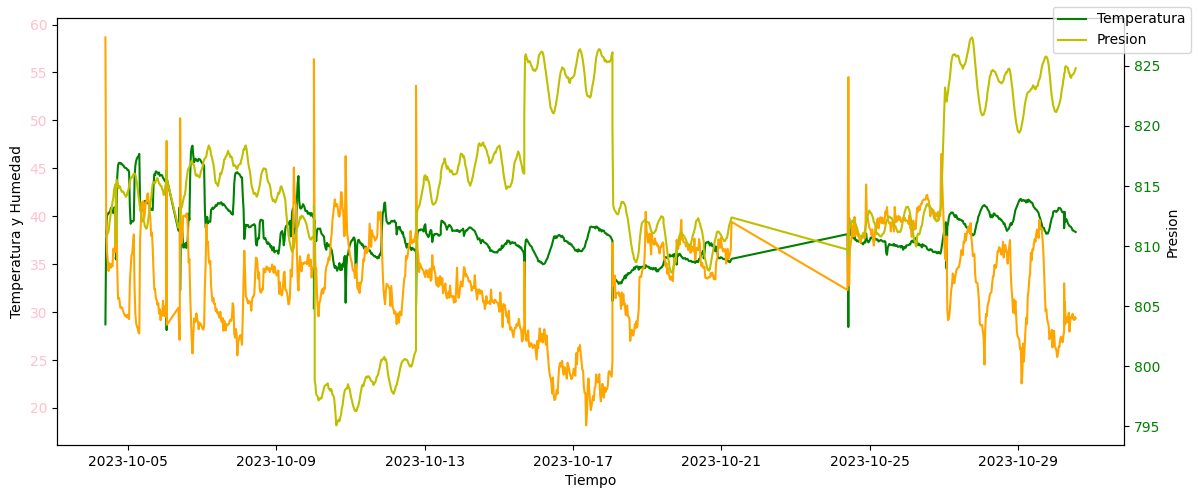

In [15]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura y Humedad")
ax1.plot(dataffl["Tiempo"], dataffl[" Temperatura"], label="Temperatura", color="g")
ax1.tick_params (axis="y", labelcolor="pink")
ax1.plot(dataffl["Tiempo"],dataffl["Humedad"], color="orange")
ax2=ax1.twinx()
ax2.set_ylabel("Presion")
ax2.plot(dataffl["Tiempo"], dataffl["Presion"],label="Presion", color="y")
ax2.tick_params (axis="y", labelcolor="g")
fig.legend(loc=1)
fig.tight_layout()